## Exercise 1, Classes

1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()

9. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))

In [1]:
class Student():
    
    def __init__(self, student_id, name, gender, data_sheet, image_url):
        self.student_id = student_id
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url
        
    def __str__(self):
        return 'Student {s_id}: {name}, {gender}, {image_url}'.format(s_id=self.student_id, name=self.name, gender=self.gender, image_url=self.image_url)
        
    def get_avg_grade(self):
        grade_list = self.data_sheet.get_grades_as_list()
        if len(grade_list) == 0:
            return 0
        avg_grade = 0
        for grade in grade_list:
            avg_grade += grade
        return round(avg_grade/len(grade_list),2)
    
    def show_progression(self):
        ETCS_needed = 150
        ETCS_completed = 0
        for course in self.data_sheet.courses:
            if self.student_id in course.grades:
                if course.grades[self.student_id] >= 2:
                    ETCS_completed += course.ETCS
        completed_per = ETCS_completed / ETCS_needed
        return round(completed_per*100, 2)
    
    #Exercise 3.2A
    def get_list_of_courses(self):
        return self.data_sheet.courses

In [2]:
class DataSheet():
    
    def __init__(self, student_id, courses):
        self.student_id = student_id
        self.courses = courses
        
    def get_grades_as_list(self):
        result = []
        for course in self.courses:
            if self.student_id in course.grades:
                result.append(course.grades[self.student_id])
        return result

In [3]:
class Course():
    
    def __init__(self, name, classroom, teacher, ETCS, grades):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ETCS = ETCS
        self.grades = grades

7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url

In [4]:
import random as r
import csv
import platform
if platform.system() == 'Windows':
    newline=''
else:
    newline=None

names = ("Alex","Jordan","Kim","Charlie","Robin","Jules","Ryley","Ridley","Frankie","Hunter")
surnames = ("Brown","Grey","Black","Stone","Wood","Baker","Smith","Bond","Carter","Parker")
genders = ("Male","Female")
grades = (-3,0,2,4,7,10,12)

def create_random_student(number_of_students):
    course_math = Course("Math", "101", "Peter", 20, {})
    course_programming = Course("Programming", "102", "Peter", 10, {})
    course_graphics = Course("Graphics", "103", "Oliver", 15, {})
    course_security = Course("Security", "104", "Mads", 30, {})
    course_gaming = Course("Gaming", "105", "Jennifer", 40, {})
    courses = (course_math, course_programming, course_graphics, course_security, course_gaming)
    
    student_list = []
    for student_id in range(1,number_of_students+1):
        name = names[r.randint(1,len(names))-1] + " " + surnames[r.randint(1,len(surnames))-1]
        image_url = name.replace(" ", "") + ".img"
        gender = genders[r.randint(1,len(genders))-1]
        student_courses = []
        for course in courses:
            if r.randint(1,2) == 1:
                student_courses.append(course)
                if r.randint(1,2) == 1:
                    course.grades[student_id] = grades[r.randint(1,len(grades))-1]
        data_sheet = DataSheet(student_id, student_courses)
        new_student = Student(student_id, name, gender, data_sheet, image_url)
        student_list.append(new_student)
    
    # return student_list
    with open("randomStudents.csv", 'w', newline=newline) as output_file:
        output_writer = csv.writer(output_file)

        for s in student_list:
            s_courses = []
            s_grades = []
            for course in s.data_sheet.courses:
                s_courses.append([course.name, course.classroom, course.teacher, course.ETCS])
                if s.student_id in course.grades:
                    s_grades.append(course.grades[s.student_id])
                else:
                    s_grades.append("No Grade")
            output_writer.writerow([s.student_id, s.name, s.gender, s_courses, s_grades, s.image_url])

In [5]:
# Tester

def test_student_creation():
    random_students = create_random_student(20)
    for student in random_students:
        print(student)
        print("Num of Courses: " + str(len(student.data_sheet.courses)))
        print("Avg Grade: " + str(student.get_avg_grade()))
        print()

#test_student_creation()
create_random_student(10)

8. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis

In [6]:
import ast

student_list = []
course_list = []

with open("randomStudents.csv") as f:
    reader = csv.reader(f)
    
    for row in reader:
        s_id = row[0]
        s_name = row[1]
        s_gender = row[2]
        s_courses_info = ast.literal_eval(row[3])
        s_grades = ast.literal_eval(row[4])
        s_image_url = row[5]
        s_courses = []
        
        for next_course in s_courses_info:
            course_index = s_courses_info.index(next_course)
            new_course = None
            for course in course_list:
                if next_course[0] == course.name:
                    new_course = course
                    break
            if new_course == None:
                new_course = Course(next_course[0], next_course[1], next_course[2], next_course[3], {})
                course_list.append(new_course)
            s_courses.append(new_course)
            if not isinstance(s_grades[course_index], str):
                new_course.grades[s_id] = s_grades[course_index]
                
        s_data_sheet = DataSheet(s_id, s_courses)
        new_student = Student(s_id, s_name, s_gender, s_data_sheet, s_image_url)
        student_list.append(new_student)

Student 9: Kim Bond, Male, KimBond.img
Amount of Courses: 1
Avarage Grade: 12.0

Student 4: Alex Grey, Male, AlexGrey.img
Amount of Courses: 3
Avarage Grade: 10.33

Student 5: Kim Carter, Male, KimCarter.img
Amount of Courses: 2
Avarage Grade: 10.0

Student 1: Jordan Stone, Male, JordanStone.img
Amount of Courses: 2
Avarage Grade: 7.0

Student 3: Jules Grey, Male, JulesGrey.img
Amount of Courses: 2
Avarage Grade: 6.0

Student 7: Hunter Grey, Male, HunterGrey.img
Amount of Courses: 2
Avarage Grade: 4.0

Student 2: Alex Carter, Female, AlexCarter.img
Amount of Courses: 3
Avarage Grade: 0.0

Student 6: Kim Wood, Male, KimWood.img
Amount of Courses: 3
Avarage Grade: 0

Student 8: Ryley Bond, Female, RyleyBond.img
Amount of Courses: 2
Avarage Grade: 0.0

Student 10: Ryley Parker, Female, RyleyParker.img
Amount of Courses: 2
Avarage Grade: 0



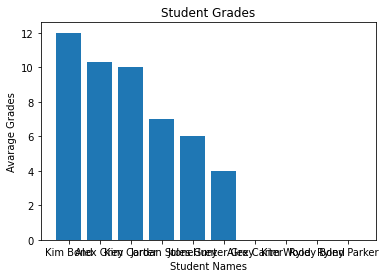

In [7]:
import matplotlib.pyplot as plt

# B Sort by
def student_sort(s):
    grade = s.get_avg_grade()
    if not isinstance(grade, str):
        return grade
    else:
        return -5

student_list.sort(reverse=True, key=student_sort)
    
# A Print out
for student in student_list:
    print(student)
    print('Amount of Courses: ' + str(len(student.data_sheet.courses)))
    print('Avarage Grade: ' + str(student.get_avg_grade()))
    print()
    
# C bar chart
names = []
grades = [] 
for student in student_list:
    names.append(student.name)
    grades.append(student_sort(student))    

    
plt.bar(names, grades)
plt.xlabel("Student Names")
plt.ylabel("Avarage Grades")
plt.title("Student Grades")

plt.show()

10. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

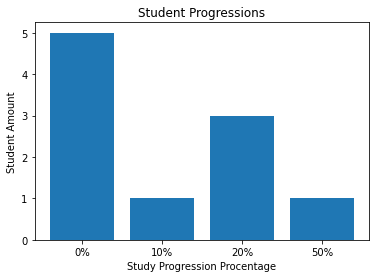

In [8]:
import matplotlib.pyplot as plt

def progress_sort(s):
    return s.show_progression()

student_list.sort(key=progress_sort)

progression = {}
category_steps = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
for student in student_list:
    s_progress = student.show_progression()
    for category in category_steps:
        if s_progress >= category:
            c_progress = str(category) + "%"
            if not c_progress in progression:
                progression[c_progress] = 1
            else:
                progression[c_progress] = progression[c_progress] + 1
            break
                   
progress = list(progression.keys())
amount_of_students = list(progression.values())

plt.bar(progress, amount_of_students)
plt.xlabel("Study Progression Procentage")
plt.ylabel("Student Amount")
plt.title("Student Progressions")

plt.show()

## Exercise 2, Exceptions

1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

In [9]:
class NotEnoughStudentsException(Exception):
    pass

def progress_sort(s):
    return s.show_progression()

def three_closest_students(s_list):
    try:
        if len(s_list) < 3:
            raise NotEnoughStudentsException()
        s_list.sort(key=progress_sort)
        return list([s_list[0], s_list[1], s_list[2]])
    except NotEnoughStudentsException:
        print('ERROR: Not enough students in list!')
        
def three_closest_students_too_file(s_list):
    
    with open("topThreeStudents.csv", 'w', newline=newline) as output_file:
        output_writer = csv.writer(output_file)
        try:
            if len(s_list) < 3:
                raise NotEnoughStudentsException()
            s_list.sort(key=progress_sort)
            for s in s_list:
                s_courses = []
                s_grades = []
                for course in s.data_sheet.courses:
                    s_courses.append([course.name, course.classroom, course.teacher, course.ETCS])
                    if s.student_id in course.grades:
                        s_grades.append(course.grades[s.student_id])
                    else:
                        s_grades.append("No Grade")
                output_writer.writerow([s.student_id, s.name, s.gender, s_courses, s_grades, s.image_url])
                if s_list.index(s) == 2:
                    break
                    
        except NotEnoughStudentsException:
            output_writer.writerow(['ERROR: Not enough students in list!'])

#three_closest_students([])
#three_closest_students_too_file([])
three_closest_students_too_file(student_list)

## Exercise 3, Plotting

1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)

['0% completed ETCS', '10% completed ETCS', '20% completed ETCS', '50% completed ETCS']
[5, 1, 3, 1]


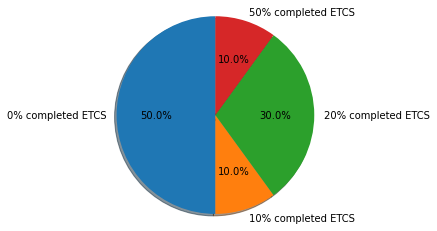

In [10]:
import matplotlib.pyplot as plt

# 1

def pie_chart_from_ECTS(s_list):
    progression = {}
    category_steps = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
    for student in s_list:
        s_progress = student.show_progression()
        for category in category_steps:
            if s_progress >= category:
                c_progress = str(category) + "% completed ETCS"
                if not c_progress in progression:
                    progression[c_progress] = 1
                else:
                    progression[c_progress] = progression[c_progress] + 1
                break
    
    x_values = list(progression.keys())
    y_values = list(progression.values())
    
    print(x_values)
    print(y_values)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(y_values, labels=x_values, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()
            
pie_chart_from_ECTS(student_list)

2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)

Males: {'Programming': 4, 'Graphics': 3, 'Gaming': 3, 'Math': 1, 'Security': 4}
Females: {'Programming': 3, 'Graphics': 1, 'Gaming': 1, 'Math': 1, 'Security': 1}


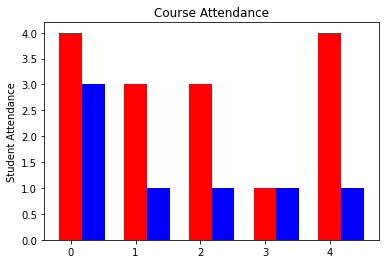

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 2

def bar_chart_student_courses(s_list):
    men_c_list = {}
    woman_c_list = {}
    for s in s_list:
        s_courses = s.get_list_of_courses()
        if s.gender == "Male":
            for c in s_courses:
                if not c.name in men_c_list:
                    men_c_list[c.name] = 1
                    woman_c_list[c.name] = 0
                else:
                    men_c_list[c.name] = men_c_list[c.name] + 1
        else:
            for c in s_courses:
                if not c.name in woman_c_list:
                    woman_c_list[c.name] = 1
                    men_c_list[c.name] = 0
                else:
                    woman_c_list[c.name] = woman_c_list[c.name] + 1
    print("Males: " + str(men_c_list))
    print("Females: " + str(woman_c_list))
    
    men_x_values = list(men_c_list.keys())
    men_y_values = list(men_c_list.values())
    woman_x_values = list(woman_c_list.keys())
    woman_y_values = list(woman_c_list.values())
    
    num_courses = len(men_x_values)
    
    ind = np.arange(num_courses)
    width = 0.35  
    
    plt.bar(ind, men_y_values, width, color='red', label='Men')
    plt.bar(ind + width, woman_y_values, width, color='blue', label='Women')
    plt.ylabel("Student Attendance")
    plt.title("Course Attendance")

    plt.show()

bar_chart_student_courses(student_list)